In [ ]:
# !pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 57.8 MB/s eta 0:00:00


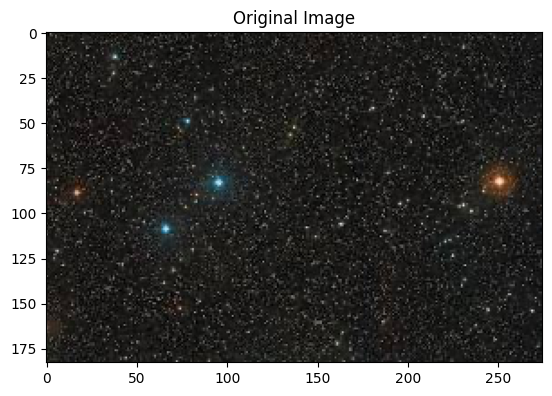

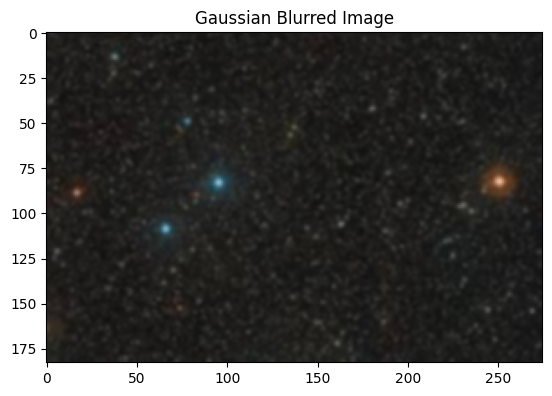

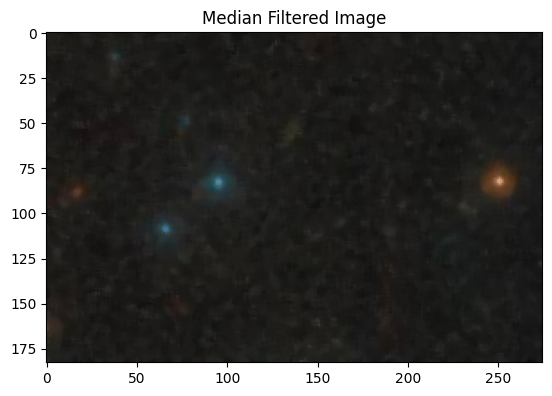

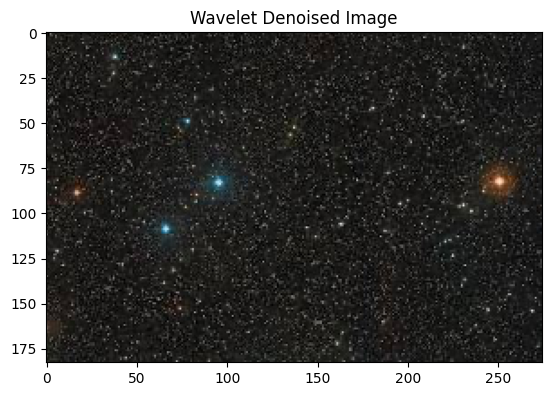

Gaussian Blur:
PSNR: 24.06, SSIM: 0.4540, MSE: 0.003925

Median Filter:
PSNR: 22.66, SSIM: 0.3235, MSE: 0.005416

Wavelet Denoising:
PSNR: 157.44, SSIM: 1.0000, MSE: 0.000000



In [ ]:
#TASK-1
import numpy as np 
import pandas as pd 
import os

import cv2
from skimage import io, restoration, metrics
from matplotlib import pyplot as plt

def load_image(path):
    image = io.imread(path)
    image = image.astype('float32') / 255.0  # Normalizing the image to [0, 1]
    return image

# Assuming 'image_path' is the path to your TIFF image
image_path = '/content/Stars.png'
original_image = load_image(image_path)

plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.show()

# Gaussian blur denoising
gaussian_blur = cv2.GaussianBlur(original_image, (5, 5), 0)

plt.imshow(gaussian_blur, cmap='gray')
plt.title('Gaussian Blurred Image')
plt.show()

# Median filtering
median_filtered = cv2.medianBlur((original_image * 255).astype(np.uint8), 5)

plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtered Image')
plt.show()

# Wavelet denoising
wavelet_denoised = restoration.denoise_wavelet(original_image, method='BayesShrink', mode='soft')

plt.imshow(wavelet_denoised, cmap='gray')
plt.title('Wavelet Denoised Image')
plt.show()



def evaluate(original, denoised, name):
    psnr = metrics.peak_signal_noise_ratio(original, denoised, data_range=1.0)
    ssim = metrics.structural_similarity(original, denoised, data_range=1.0, win_size=3, channel_axis=None)
    mse = metrics.mean_squared_error(original, denoised)
    print(f"{name}:\nPSNR: {psnr:.2f}, SSIM: {ssim:.4f}, MSE: {mse:.6f}\n")

# Convert median filtered image back to float32 in [0,1] range for evaluation
median_filtered_norm = median_filtered.astype('float32') / 255.0

# Evaluate all methods
evaluate(original_image, gaussian_blur, 'Gaussian Blur')
evaluate(original_image, median_filtered_norm, 'Median Filter')
evaluate(original_image, wavelet_denoised, 'Wavelet Denoising')


In [15]:
import cv2
import numpy as np

cap = cv2.VideoCapture('sample.mp4')

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        print("Failed to grab frame. Exiting...")
        break

    frame = cv2.resize(frame, (540, 380), interpolation=cv2.INTER_CUBIC)

    cv2.imshow('Original Frame', frame)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    Thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)

    cv2.imshow('Thresholded Frame', Thresh)

    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Failed to grab frame. Exiting...


In [16]:
import cv2
import numpy as np

# Creating a VideoCapture object to read the video
cap = cv2.VideoCapture('sample.mp4')

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        print("Failed to grab frame. Exiting...")
        break

    frame = cv2.resize(frame, (540, 380), interpolation=cv2.INTER_CUBIC)

    # Display the original frame
    cv2.imshow("Original Frame", frame)

    # Apply Gaussian Blur
    gaussianblur = cv2.GaussianBlur(frame, (5, 5), 0)

    # Display the blurred frame
    cv2.imshow("Gaussian Blurred Frame", gaussianblur)

    # Wait for 25ms and exit on pressing 'q'
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release the video capture object
cap.release()
cv2.destroyAllWindows()


Failed to grab frame. Exiting...


In [17]:
import cv2
import numpy as np
import time  # Optional: to slow down the display

# Load video file
cap = cv2.VideoCapture('sample.mp4')  # Update path as needed

if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

while True:
    ret, frame = cap.read()

    if not ret:
        print("End of video or failed to grab frame.")
        break

    # Resize the frame
    frame = cv2.resize(frame, (540, 380), interpolation=cv2.INTER_CUBIC)

    # Display original frame
    cv2.imshow("Original Frame", frame)

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edge_detect = cv2.Canny(gray, 100, 200)

    # Display edge detection result
    cv2.imshow("Canny Edge Detection", edge_detect)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

    time.sleep(0.1)  # Optional delay to slow down frame display

# Release resources
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [18]:
import cv2
import numpy as np

# Creating a VideoCapture object to read the video
cap = cv2.VideoCapture('sample.mp4')  # Make sure the file path is correct

if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

# Loop until the end of the video
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        print("End of video or failed to read frame.")
        break

    frame = cv2.resize(frame, (540, 380), interpolation=cv2.INTER_CUBIC)

    # Display original frame
    cv2.imshow("Original Frame", frame)

    # Convert to grayscale for bitwise operation mask
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Generate mask using OTSU thresholding
    _, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Apply bitwise NOT operation
    bitwise_result = cv2.bitwise_not(frame, frame, mask=mask)

    # Display bitwise NOT result
    cv2.imshow("Bitwise NOT Result", bitwise_result)

    # Add delay and quit condition
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release the video object
cap.release()
cv2.destroyAllWindows()

End of video or failed to read frame.


: 